In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import pickle
import matplotlib.pyplot as plt
import data_tools
import lstm

In [2]:
model = lstm.bmi_LSTM()
model.read_cfg_file('lstm-info.cfg')

In [3]:
model.initialize()

In [4]:
model.input_tensor.shape

torch.Size([2492, 11])

In [5]:
model.update()

updating for t:  1772
start_this_seq 1771
for time: 1773 lstm output: 280.4543401271451


In [6]:
model.input_tensor.shape

torch.Size([2492, 11])

In [7]:
model.update_until(model.iend)

updating for t:  1773
start_this_seq 1772
for time: 1774 lstm output: 368.4212926881102
updating for t:  1774
start_this_seq 1773
for time: 1775 lstm output: 385.1320541492791
updating for t:  1775
start_this_seq 1774
for time: 1776 lstm output: 379.29316693599196
updating for t:  1776
start_this_seq 1775
for time: 1777 lstm output: 354.98885845995835
updating for t:  1777
start_this_seq 1776
for time: 1778 lstm output: 321.35492842247015
updating for t:  1778
start_this_seq 1777
for time: 1779 lstm output: 289.49065578156524
updating for t:  1779
start_this_seq 1778
for time: 1780 lstm output: 264.6895446192031
updating for t:  1780
start_this_seq 1779
for time: 1781 lstm output: 247.71037031800438
updating for t:  1781
start_this_seq 1780
for time: 1782 lstm output: 236.17344095276368
updating for t:  1782
start_this_seq 1781
for time: 1783 lstm output: 228.5065968681894
updating for t:  1783
start_this_seq 1782
for time: 1784 lstm output: 222.91561107823296
updating for t:  1784
sta

for time: 2093 lstm output: 12.14513972782386
updating for t:  2093
start_this_seq 2092
for time: 2094 lstm output: 12.291235785350082
updating for t:  2094
start_this_seq 2093
for time: 2095 lstm output: 12.181587927157134
updating for t:  2095
start_this_seq 2094
for time: 2096 lstm output: 12.354850584166241
updating for t:  2096
start_this_seq 2095
for time: 2097 lstm output: 12.513145053218606
updating for t:  2097
start_this_seq 2096
for time: 2098 lstm output: 12.642113342624876
updating for t:  2098
start_this_seq 2097
for time: 2099 lstm output: 12.628064124950349
updating for t:  2099
start_this_seq 2098
for time: 2100 lstm output: 12.78581823947677
updating for t:  2100
start_this_seq 2099
for time: 2101 lstm output: 12.013710436001814
updating for t:  2101
start_this_seq 2100
for time: 2102 lstm output: 13.010877737472732
updating for t:  2102
start_this_seq 2101
for time: 2103 lstm output: 12.637908134613452
updating for t:  2103
start_this_seq 2102
for time: 2104 lstm out

for time: 2419 lstm output: 28.489270643140216
updating for t:  2419
start_this_seq 2418
for time: 2420 lstm output: 27.49942937275913
updating for t:  2420
start_this_seq 2419
for time: 2421 lstm output: 27.2463964193725
updating for t:  2421
start_this_seq 2420
for time: 2422 lstm output: 26.062111145947494
updating for t:  2422
start_this_seq 2421
for time: 2423 lstm output: 24.448693400865547
updating for t:  2423
start_this_seq 2422
for time: 2424 lstm output: 23.725699964123653
updating for t:  2424
start_this_seq 2423
for time: 2425 lstm output: 23.353875398236017
updating for t:  2425
start_this_seq 2424
for time: 2426 lstm output: 21.53106567949962
updating for t:  2426
start_this_seq 2425
for time: 2427 lstm output: 21.124835785216074
updating for t:  2427
start_this_seq 2426
for time: 2428 lstm output: 20.63355427234311
updating for t:  2428
start_this_seq 2427
for time: 2429 lstm output: 19.626330679073895
updating for t:  2429
start_this_seq 2428
for time: 2430 lstm output

In [8]:
print(np.array(model.obs).shape)
print(len(model.output_list))

(720,)
720


DatetimeIndex(['2015-12-01 00:00:00', '2015-12-01 01:00:00',
               '2015-12-01 02:00:00', '2015-12-01 03:00:00',
               '2015-12-01 04:00:00', '2015-12-01 05:00:00',
               '2015-12-01 06:00:00', '2015-12-01 07:00:00',
               '2015-12-01 08:00:00', '2015-12-01 09:00:00',
               ...
               '2015-12-29 15:00:00', '2015-12-29 16:00:00',
               '2015-12-29 17:00:00', '2015-12-29 18:00:00',
               '2015-12-29 19:00:00', '2015-12-29 20:00:00',
               '2015-12-29 21:00:00', '2015-12-29 22:00:00',
               '2015-12-29 23:00:00', '2015-12-30 00:00:00'],
              dtype='datetime64[ns]', length=697, freq='H')


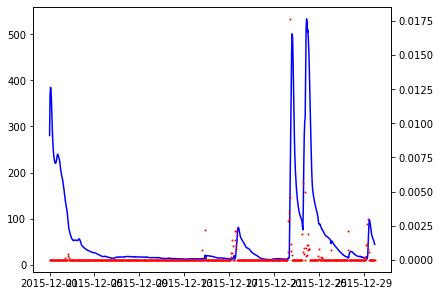

In [9]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = pd.date_range(model.test_date_start, model.test_date_end, freq="H")
print(xdata)
#ax.plot(xdata, np.array(model.obs)[:xdata.shape[0]], label='observation', c='k')
ax.plot(xdata, model.output_list[:xdata.shape[0]], label='lstm output', c='b')
ax2=ax.twinx()
ax2.scatter(xdata,model.forcings['RAINRATE'].values[-721:-24], s=1, c='r')

In [10]:
model.calc_metrics()

Nash-Suttcliffe Efficiency -0.6414411697045139
on 720 samples
